# **LAB4: Train an MLP with dropout and batch normalization for classification tasks**

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import seaborn as sns

In [3]:
data = pd.read_csv('/content/drive/MyDrive/CPCB.csv')

In [18]:
df = pd.read_csv('/content/drive/MyDrive/CPCB.csv')

In [5]:
data.head()

,Datetime,NO2,O3,CO,SO2,Temp,RH,PM2.5,PM10
0,01-07-2022 00:00,2.175523,1.171429,233.043584,4.965646,23.336625,72.361834,11.883808,19.943981
1,01-07-2022 01:00,2.175523,1.171429,233.043584,4.965646,23.336625,72.361834,11.883808,19.943981
2,01-07-2022 02:00,2.175523,1.171429,233.043584,4.965646,23.336625,72.361834,11.883808,19.943981
3,01-07-2022 03:00,2.175523,1.171429,233.043584,4.965646,23.336625,72.361834,11.883808,19.943981
4,01-07-2022 04:00,2.175523,1.171429,233.043584,4.965646,23.336625,72.361834,11.883808,19.943981


In [6]:
data.describe()

,NO2,O3,CO,SO2,Temp,RH,PM2.5,PM10
count,8881.000000,8881.000000,8881.000000,8881.000000,8881.000000,8881.000000,8881.000000,8881.000000
mean,2.176745,1.173476,235.143765,4.978822,23.293260,72.685802,12.092634,20.034472
std,0.585049,2.622279,121.485137,1.170514,2.782650,15.706897,8.870804,15.536308
min,1.765969,0.186224,0.000000,2.920644,17.892000,13.042500,0.279585,0.319974
25%,2.132156,0.447881,165.583675,3.943222,21.000000,68.760000,5.358683,10.096638
50%,2.175523,0.684918,233.043584,4.965646,23.336625,72.361834,11.883808,19.943981
75%,2.241776,1.171429,250.962758,6.037213,25.412000,84.490000,13.989915,21.900803
max,25.885676,34.519615,1332.431136,9.834521,28.319500,99.132500,66.804468,392.741170


In [7]:
data.shape

(8881, 9)

In [8]:
data.dtypes

,0
Datetime,object
NO2,float64
O3,float64
CO,float64
SO2,float64
Temp,float64
RH,float64
PM2.5,float64
PM10,float64


In [9]:
data.columns

Index(['Datetime', 'NO2', 'O3', 'CO', 'SO2', 'Temp', 'RH', 'PM2.5', 'PM10'], dtype='object')

In [10]:
data.isnull().sum()
# No missing values

,0
Datetime,0
NO2,0
O3,0
CO,0
SO2,0
Temp,0
RH,0
PM2.5,0
PM10,0


In [11]:
data_numerical = data.select_dtypes(include=np.number)

In [12]:
data_selected = data_numerical[['NO2', 'O3', 'CO', 'SO2', 'Temp', 'RH', 'PM2.5', 'PM10']]

scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_selected), columns=data_selected.columns)

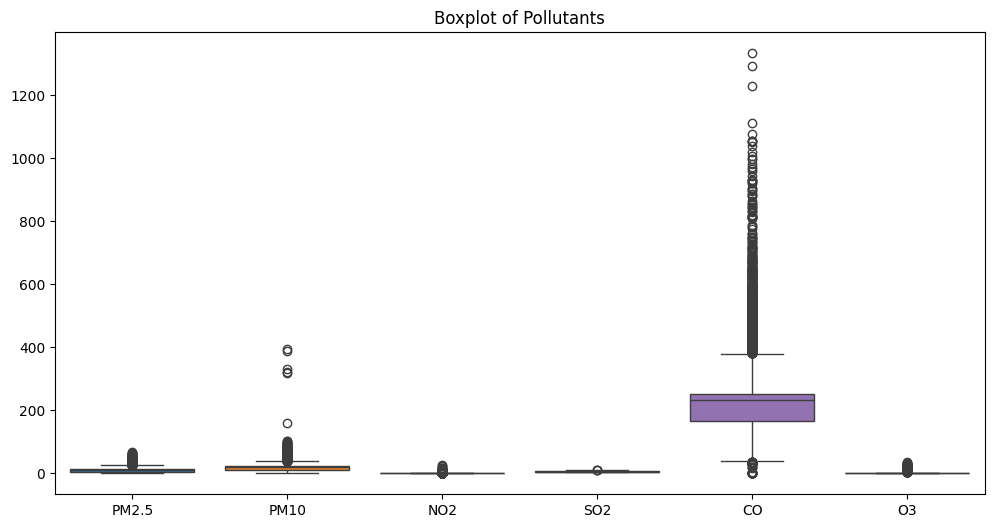

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']])
plt.title("Boxplot of Pollutants")
plt.show()

In [16]:
Q1 = np.percentile(data_scaled, 25, axis=0)
Q3 = np.percentile(data_scaled, 75, axis=0)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_df = pd.DataFrame([lower_bound], columns=data_scaled.columns)
upper_df = pd.DataFrame([upper_bound], columns=data_scaled.columns)

data_winsorized = data_scaled.clip(lower=lower_df, upper=upper_df, axis=1)

numerical_data = data_winsorized[['NO2', 'O3', 'CO', 'SO2', 'Temp', 'RH', 'PM2.5', 'PM10']]

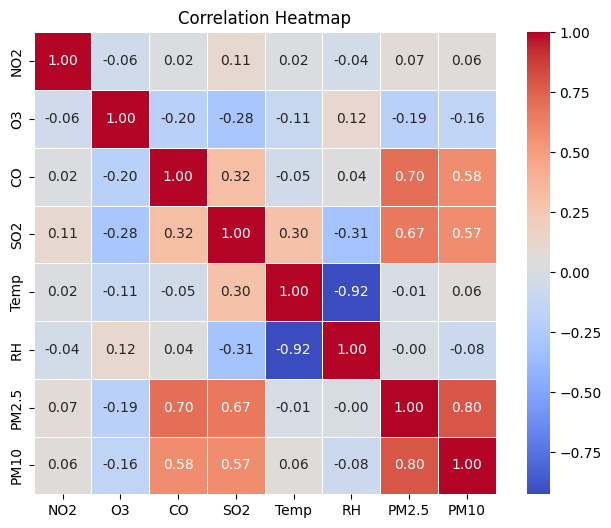

In [19]:
# Compute correlation matrix
corr_matrix = df.select_dtypes(include=np.number).corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

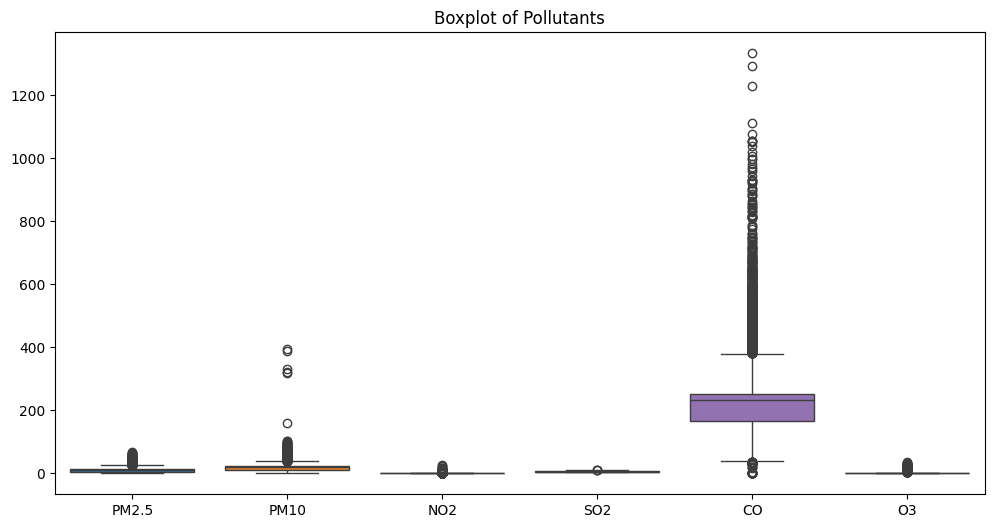

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']])
plt.title("Boxplot of Pollutants")
plt.show()

In [21]:
column_names = [ 'CO', 'SO2', 'PM10','PM2.5']
df = pd.DataFrame(data, columns=column_names)

X = df.drop('PM2.5', axis=1)
y = df['PM2.5']

X.columns = ['CO', 'SO2', 'PM10']
df = pd.DataFrame(X, columns=X.columns)
df['target'] = y
print(df.head())
print(df.head())

           CO       SO2       PM10     target
0  233.043584  4.965646  19.943981  11.883808
1  233.043584  4.965646  19.943981  11.883808
2  233.043584  4.965646  19.943981  11.883808
3  233.043584  4.965646  19.943981  11.883808
4  233.043584  4.965646  19.943981  11.883808
           CO       SO2       PM10     target
0  233.043584  4.965646  19.943981  11.883808
1  233.043584  4.965646  19.943981  11.883808
2  233.043584  4.965646  19.943981  11.883808
3  233.043584  4.965646  19.943981  11.883808
4  233.043584  4.965646  19.943981  11.883808


In [22]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
print("Before Scaling")
print(X_train)
print(X_test)

Before Scaling
              CO       SO2       PM10
3872  235.439288  3.483709   4.425415
1345  116.426022  3.469588   6.824127
7978  188.868879  4.948150  11.438337
5924  214.741329  6.507905  22.450042
7301  103.489797  4.203280   5.806588
...          ...       ...        ...
5734  325.992861  6.713245  32.312032
5191   72.442858  5.760682   4.892319
5390  233.043584  4.965646  19.943981
860   233.043584  4.965646  19.943981
7270  188.868879  7.345149  21.161173

[7104 rows x 3 columns]
              CO       SO2       PM10
7810  170.758165  5.302934  14.814516
736   106.077042  3.309553   6.020702
4423  230.264798  4.496285  24.920125
2138   82.791838  3.793189   5.922417
3685  233.043584  4.965646  19.943981
...          ...       ...        ...
8377  233.043584  4.965646  19.943981
2580  162.996430  3.907920  10.832280
6149  369.976024  7.086268  44.371778
7963  302.707656  5.011693  13.431947
2287  233.043584  4.965646  19.943981

[1777 rows x 3 columns]


In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("After Scaling")
print(X_train)
print(X_test)

After Scaling
[[ 0.00419242 -1.27363307 -1.0123011 ]
 [-0.98032254 -1.28570194 -0.85649354]
 [-0.38105256 -0.02199069 -0.55677897]
 ...
 [-0.01562559 -0.00703685 -0.00429756]
 [-0.01562559 -0.00703685 -0.00429756]
 [-0.38105256  2.02669998  0.07476478]]
[[-0.53087006  0.28123967 -0.33748035]
 [-1.06593253 -1.42248247 -0.90867975]
 [-0.03861258 -0.40819453  0.3189263 ]
 ...
 [ 1.11712238  1.80543736  1.58240228]
 [ 0.5606574   0.03231922 -0.42728466]
 [-0.01562559 -0.00703685 -0.00429756]]


In [39]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.1),
    tf.keras.layers.Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    tf.keras.layers.Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    tf.keras.layers.Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    tf.keras.layers.Dense(1, activation='relu')  # no activation for regression
])

In [40]:
# Compile and train
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.1)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 212.8499 - mae: 11.4362 - val_loss: 199.2183 - val_mae: 11.3081
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 134.2166 - mae: 9.2722 - val_loss: 114.9362 - val_mae: 8.8326
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 80.5892 - mae: 7.0729 - val_loss: 52.6615 - val_mae: 5.6698
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 50.0829 - mae: 5.3141 - val_loss: 32.0670 - val_mae: 3.9357
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 36.1231 - mae: 4.3273 - val_loss: 24.9656 - val_mae: 3.2185
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28.2187 - mae: 3.8050 - val_loss: 21.6260 - val_mae: 2.8963
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 25.4909 - mae: 3.5415 - val_loss: 19.9793 - val_mae: 2.7860
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 24.7054 - mae: 3.4842 - val_loss: 18.1926 - val_mae: 2.5600
Epoch 9/50
100/100 ━━━━━━━━━━━━━━━

In [41]:
# Evaluate
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {loss:.4f}, Test MAE: {mae:.4f}")

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.7138 - mae: 1.9138
Test Loss (MSE): 9.5981, Test MAE: 1.9941


In [42]:
# Predict using the model
y_pred = model.predict(X_test)

# Compute R² Score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
R² Score: 0.8708


In [43]:
for i in range(5):
    print(f"Predicted PM2.5: {y_pred[i][0]:.2f}, Actual PM2.5: {y_test.iloc[i]:.2f}")

Predicted PM2.5: 10.14, Actual PM2.5: 7.39
Predicted PM2.5: 3.68, Actual PM2.5: 2.30
Predicted PM2.5: 12.91, Actual PM2.5: 19.44
Predicted PM2.5: 4.07, Actual PM2.5: 2.32
Predicted PM2.5: 11.82, Actual PM2.5: 11.88


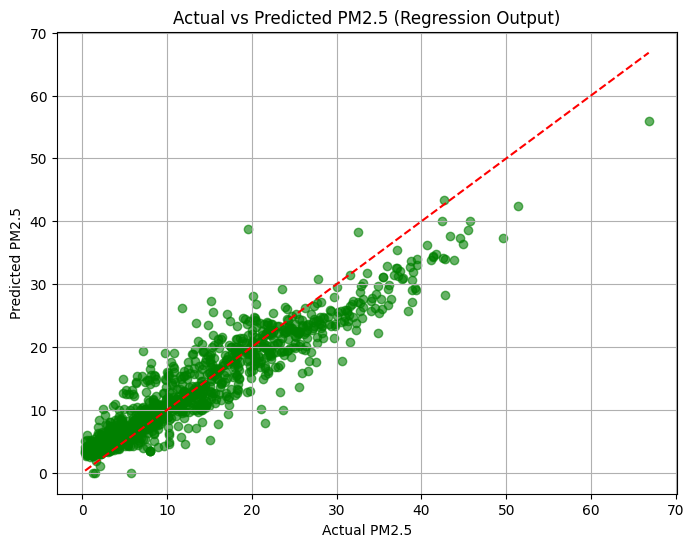

In [44]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual PM2.5')
plt.ylabel('Predicted PM2.5')
plt.title('Actual vs Predicted PM2.5 (Regression Output)')
plt.grid(True)
plt.show()